In [ ]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

In [ ]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


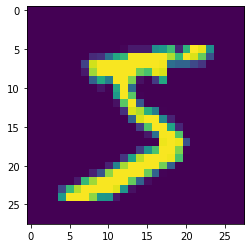

In [ ]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [ ]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividing each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D

from tensorflow.keras.layers import BatchNormalization, Activation
# build the model object
model = Sequential()

model.add(Convolution2D(8,(3, 3), activation ='relu',input_shape = (28,28,1))) # Channel dimension = 26*26*10 , receptive field 3*3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,(3, 3), activation ='relu'))                         # Channel dimension = 24*24*16 , receptive field 5*5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8,(1,1), activation ='relu'))                        # Channel dimension = 24*24*10 , receptive field 5*5
model.add(MaxPooling2D(pool_size=(2,2))) #12                                # Channel dimension = 12*12*10 , receptive field 10*10

model.add(Convolution2D(10,(3,3), activation ='relu'))                        # Channel dimension = 10*10*16 , receptive field 12*12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,(3,3), activation ='relu'))                         # Channel dimension = 8*8*16 , receptive field 14*14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,(3,3), activation ='relu'))                         # Channel dimension = 6*6*16 , receptive field 16*16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,(3,3), activation ='relu'))                         # Channel dimension = 4*4*16 , receptive field 18*18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,4,4))                                             # Channel dimension 4*4 to see the complete image 

model.add(Flatten())

model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 26, 26, 8)         32        
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         1

In [ ]:
# We are importing the Adam Optimizer
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 50s 10ms/step - loss: 0.5565 - accuracy: 0.8177 - val_loss: 0.1482 - val_accuracy: 0.9499
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 4s 8ms/step - loss: 0.0829 - accuracy: 0.9740 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 4s 8ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0427 - val_accuracy: 0.9858
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 4s 8ms/step - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.0328 - val_accuracy: 0.9888
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 4s 

In [ ]:
print("Validation Score:" , model.evaluate(X_test, Y_test)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9937
Validation Score: 0.9937000274658203
